In [26]:
import pandas as pd
import geopandas as gpd
import plotly.express as px
import matplotlib.pyplot as plt

In [24]:
regions = gpd.read_file('regions_2015_metropole_region.geojson')
regions

,R�gION,geometry
0,"Alsace, Champagne-Ardenne et Lorraine","POLYGON ((7.57822 48.11831, 7.57795 48.11754, ..."
1,"Aquitaine, Limousin et Poitou-Charentes","MULTIPOLYGON (((1.44898 45.01620, 1.44835 45.0..."
2,Auvergne et Rh�ne-Alpes,"MULTIPOLYGON (((6.26109 45.12371, 6.26090 45.1..."
3,Basse-Normandie et Haute-Normandie,"POLYGON ((1.71469 49.40618, 1.71476 49.40604, ..."
4,Bourgogne et Franche-Comt�,"POLYGON ((6.94079 47.43019, 6.94066 47.42789, ..."
5,Bretagne,"MULTIPOLYGON (((-1.94715 48.53577, -1.94730 48..."
6,Centre,"POLYGON ((2.16889 46.42084, 2.16776 46.42082, ..."
7,Corse,"POLYGON ((9.39521 41.85758, 9.39504 41.85742, ..."
8,Ile-de-France,"POLYGON ((1.60962 49.07458, 1.61075 49.07488, ..."
9,Languedoc-Roussillon et Midi-Pyr�n�es,"MULTIPOLYGON (((4.10162 43.55122, 4.10101 43.5..."


In [25]:
regions = (regions.rename(columns={'R�gION': 'Région'})
                    .replace('Auvergne et Rh�ne-Alpes', 'Auvergne et Rhône-Alpes')
                    .replace('Bourgogne et Franche-Comt�', 'Bourgogne et Franche-Comté')
                    .replace('Languedoc-Roussillon et Midi-Pyr�n�es', 'Languedoc-Roussillon et Midi-Pyrénées')
                    .replace("Provence-Alpes-C�te d'Azur", "Provence-Alpes-Côte d'Azur"))
regions

,Région,geometry
0,"Alsace, Champagne-Ardenne et Lorraine","POLYGON ((7.57822 48.11831, 7.57795 48.11754, ..."
1,"Aquitaine, Limousin et Poitou-Charentes","MULTIPOLYGON (((1.44898 45.01620, 1.44835 45.0..."
2,Auvergne et Rhône-Alpes,"MULTIPOLYGON (((6.26109 45.12371, 6.26090 45.1..."
3,Basse-Normandie et Haute-Normandie,"POLYGON ((1.71469 49.40618, 1.71476 49.40604, ..."
4,Bourgogne et Franche-Comté,"POLYGON ((6.94079 47.43019, 6.94066 47.42789, ..."
5,Bretagne,"MULTIPOLYGON (((-1.94715 48.53577, -1.94730 48..."
6,Centre,"POLYGON ((2.16889 46.42084, 2.16776 46.42082, ..."
7,Corse,"POLYGON ((9.39521 41.85758, 9.39504 41.85742, ..."
8,Ile-de-France,"POLYGON ((1.60962 49.07458, 1.61075 49.07488, ..."
9,Languedoc-Roussillon et Midi-Pyrénées,"MULTIPOLYGON (((4.10162 43.55122, 4.10101 43.5..."


In [23]:
caracteristiques = pd.read_csv('https://www.data.gouv.fr/fr/datasets/r/e22ba475-45a3-46ac-a0f7-9ca9ed1e283a', sep=';')
lieux = pd.read_csv('https://www.data.gouv.fr/fr/datasets/r/2ad65965-36a1-4452-9c08-61a6c874e3e6', sep=';')
vehicules = pd.read_csv('https://www.data.gouv.fr/fr/datasets/r/780cd335-5048-4bd6-a841-105b44eb2667', sep=';')
usagers = pd.read_csv('https://www.data.gouv.fr/fr/datasets/r/36b1b7b3-84b4-4901-9163-59ae8a9e3028', sep=';')
ids_accidents_mortels = usagers[usagers.grav == 2].Num_Acc.tolist()
caracteristiques['mortel'] = caracteristiques.Num_Acc.isin(ids_accidents_mortels)

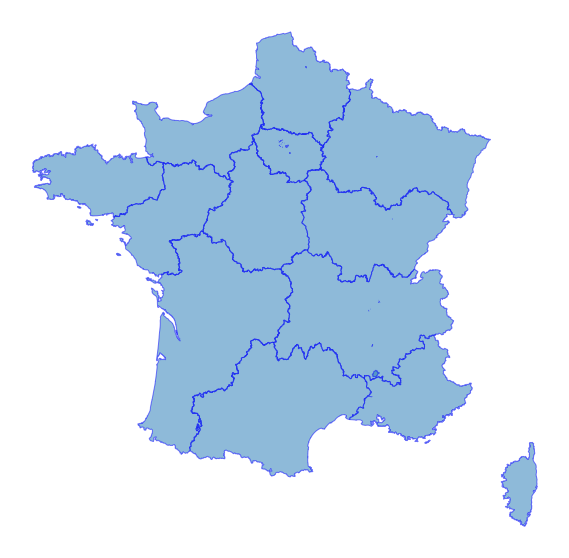

In [28]:
fig, ax = plt.subplots(figsize=(10, 10))
regions.plot(ax = ax, alpha=0.5, edgecolor='blue')
ax.set_axis_off()

In [30]:
departements = pd.read_csv('departements-france.csv')
departements.head()

,code_departement,nom_departement,code_region,nom_region
0,01,Ain,84,Auvergne-Rhône-Alpes
1,02,Aisne,32,Hauts-de-France
2,03,Allier,84,Auvergne-Rhône-Alpes
3,04,Alpes-de-Haute-Provence,93,Provence-Alpes-Côte d'Azur
4,05,Hautes-Alpes,93,Provence-Alpes-Côte d'Azur


In [38]:
accidents = caracteristiques.merge(lieux, on='Num_Acc')
accidents.dep.dtype

dtype('O')